### Sumário

- Distribuição Normal Multivariada
- Distribuição Normal Multivariada - Variáveis independentes
- Distribuição Normal Multivariada - Variáveis dependentes
- Conclusão

### Distribuição Normal Multivariada

Neste tópico vamos discutir a distribuição normal multivariada, esta pdf é usada para representar processos estocásticos envolvendo mais de uma variável aleátoria, seu uso é tão comum como a pdf gaussian já que vários fenômenos da natureza podem ser modelados com pdf gaussianas.

Além disso, a distribuição normal multivariada representa uma forma concisa e prática para analisar diferentes variáveis independentes com pdf gaussias como veremos a seguir.

Vamos apresentar agora a equação da distribuição e seus parâmetros:

Dada um conjunto de variáveis aleatórias, $X = \{X_1, X_2, ..., X_k\}$ temos:

$X$ ~ $N(\mu, \Sigma)$

Onde, $\mu = E[X] = (E[X_1], E[X_2], ..., E[X_k])$ um vetor de dimenção k

e

$\Sigma_{i,j} = E[(X_i-\mu_{i})(X_j-\mu_{j})] = Cov[X_i, X_j]$

Ou seja, uma matriz de dimensões k que contem a covariância entre as k variáveis aleatórias.

### Distribuição Normal Multivariada - Variáveis independentes

Caso as vairáveis aleatórias sejam independentes a covariância entre elas será 0 e a matriz de covariância será diagonal. Para ilustrar esse fato, vamos simular variáveis independentes uma com $\mu = 1$ e $\sigma = 1$ e outra com $\mu = 2$ e $\sigma = \sqrt{2}$ calcular os parâmtros da gaussiana multivariada. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
x1 = np.random.normal(1, 1, 1000)
x2 = np.random.normal(2, np.sqrt(2), 1000)

In [4]:
np.std(x1), np.mean(x1)

(0.9861696541367836, 1.045453579155109)

In [5]:
np.std(x2), np.mean(x2)

(1.4124853838266809, 2.0259117080896325)

Vemos que os parâmetros estimados são muito prómixos ao escolhidos, analisemos agora a matriz de covariância.

In [6]:
np.cov(x1, x2)

array([[0.97350409, 0.06282539],
       [0.06282539, 1.99711207]])

Como esperado os elementos fora da diagonal são próximos a zero, e os elementos da diagonal são proximos a $\sigma_{1}^2$ e $\sigma_{2}^2$ como esperado, já que a covariância de uma variável aleatória gaussana com ele mesma é igual a $\sigma^2$.


Vamos ver como fica gráficamente a pdf dessas duas variáveis, podemos fazer isso, pois a pdf neste caso pode ser expressa com um gráfico 3D.

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
mu = np.array([1, 2])
cov = np.array([[1, 0], [0, 2]])

In [9]:
x_range = np.linspace(-4, 6, 25)
y_range = np.linspace(-3, 7, 25)

In [10]:
grid_x, grid_y = np.meshgrid(x_range, y_range)

In [11]:
grid_x_f = grid_x.reshape(-1, 1)
grid_y_f = grid_y.reshape(-1, 1)

In [12]:
grid = np.hstack([grid_x_f, grid_y_f])

In [13]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    den = np.sqrt(((2*np.pi)**len(cov))*det)
    x_ = x-mu
    cov_inv = np.linalg.inv(cov)
    coef = np.multiply(np.dot(x_, cov_inv), x_)
    coef = np.sum(coef, 1)
    num = np.exp(-0.5*coef)
    return num/den
    

In [14]:
pdf = multivariate_normal(grid, mu, cov)
pdf = pdf.reshape(grid_x.shape)

Text(0.5, 0, 'Y (x2)')

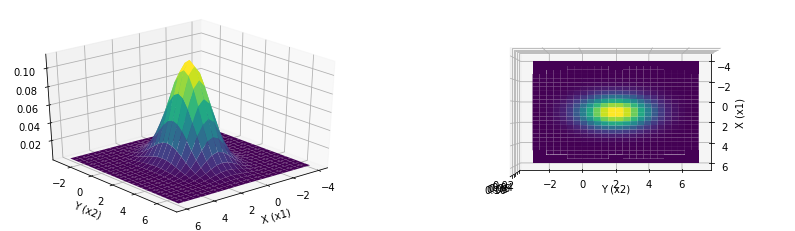

In [50]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(grid_x, grid_y, pdf, cmap='viridis')
ax.view_init(elev=30, azim=50)
ax.set_xlabel("X (x1)")
ax.set_ylabel("Y (x2)")
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(grid_x, grid_y, pdf, cmap='viridis')
ax.view_init(elev=90, azim=0)
ax.set_xlabel("X (x1)")
ax.set_ylabel("Y (x2)")

Podemos ver que a pdf está centralizada nas coordenadas (1, 2) ou seja nas médias das variáveis $x_1$ e $x_2$ e se alonga mais ao longo da direção Y como era esperado já que a variância da vairiável $x_2$ tem uma variância maior. 

### Distribuição Normal Multivariada - Variáveis dependentes

Neste caso as variáveis são interligadas, ou seja, quando $x_1$ aumente $x_2$ tende a ser maior também (caso haja uma correlação positiva entre essas variáveis), por existir essa depenendcia entre as variáveis a matriz de covariância não é mais diagonal e os elementos fora da diagonal são diferentes de zero.

### Conclusão

Neste tópico discutimos:
- A distribuição normal multivariada
- Simulamos amostras de duas variáveis com pdf gaussiana
- Representamos as duas com um pdf multivariada
- Ilustramos os gráficos da pdf e a relação com os parâmtros $\mu$ e $\Sigma$